In [1]:
library(plyr)
library(ggplot2)

In [3]:
load('summary_alpha.Rdata')

In [12]:
adaptive = ddply(summary_adaptive_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
oracle = ddply(summary_oracle_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(summary_volume_stein_single_alpha, .(b, s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / 100)), coverage = mean(coverage))
Stein_radius = ddply(summary_radius_stein_single_alpha, .(b, s, lam1Type, method, design), summarise, 
                            r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_vol = ddply(summary_volume_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_radius = ddply(summary_radius_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'bottom')
dataset1 = rbind(adaptive, oracle, Stein_vol, Lasso_vol)
dataset1$method[dataset1$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset1$method[dataset1$method == 'twoStepLassoVolume'] = 'two-step Lasso'

dataset1$method = factor(dataset1$method, levels = c('adaptive', 'oracle', 'two-step stein', 'two-step Lasso'))
dataset1$design = factor(dataset1$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset1$lam1Type = factor(dataset1$lam1Type, levels = c('val', 'cv', '1se'))

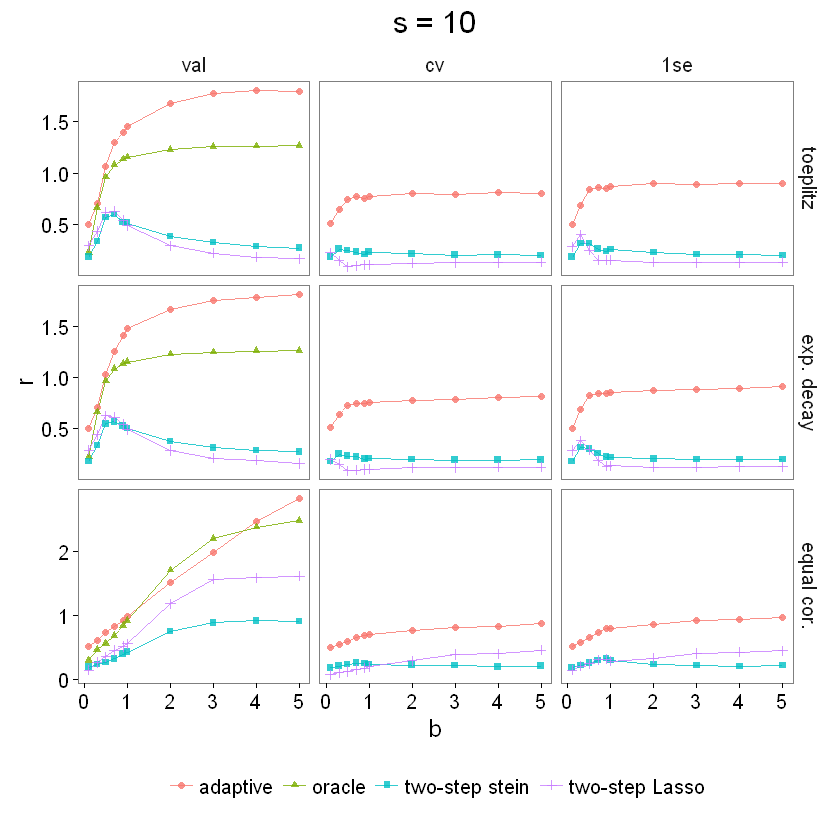

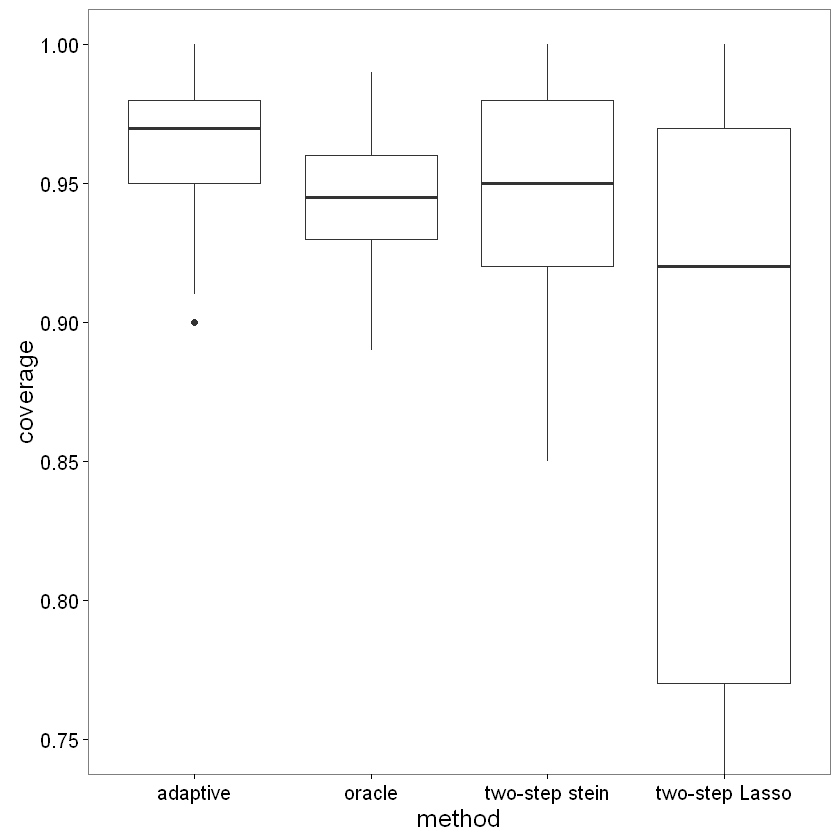

In [24]:
ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 10") + 
  theme_settings
  
ggsave('poster_r.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset1[dataset1$s == 10, ], aes(x = method, y = coverage)) + 
  geom_boxplot() + coord_cartesian(ylim = c(0.75, 1)) +
  theme_settings
ggsave('poster_coverage.pdf', width = 6.67, height = 2, units = 'in')